In [3]:
import nilearn.plotting
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
VI_striatum = '../templates/Striatum_network_1.nii.gz'
SM_striatum = '../templates/Striatum_network_2.nii.gz'
DA_striatum = '../templates/Striatum_network_3.nii.gz'
VA_striatum = '../templates/Striatum_network_4.nii.gz'
FP_striatum = '../templates/Striatum_network_6.nii.gz'
DM_striatum = '../templates/Striatum_network_7.nii.gz'
choi_full = '/projects/edickie/analysis/STOPPD_RST/201611_striatum/Choi2012_binary_2x2x2.nii.gz'


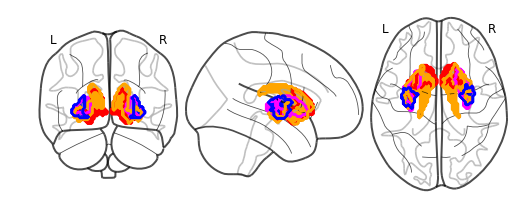

In [3]:
display = nilearn.plotting.plot_glass_brain(None)
display.add_contours(DM_striatum, filled = True, colors = 'red')
display.add_contours(VA_striatum, filled = True, colors = 'magenta')
display.add_contours(FP_striatum, filled = True, colors = 'orange')
display.add_contours(SM_striatum, filled = True, colors = 'blue')

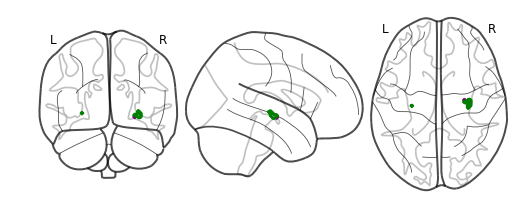

In [8]:
display = nilearn.plotting.plot_glass_brain(None)
display.add_contours(VI_striatum, filled = True, colors = 'purple')
display.add_contours(DA_striatum, filled = True, colors = 'green')

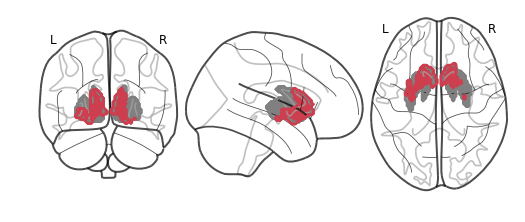

In [16]:
display = nilearn.plotting.plot_glass_brain(None)
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(DM_striatum, filled = True, colors = '#cd3e4e')


In [17]:
display.savefig('../templates/thumbnails/DM_striatum_xyz.png')

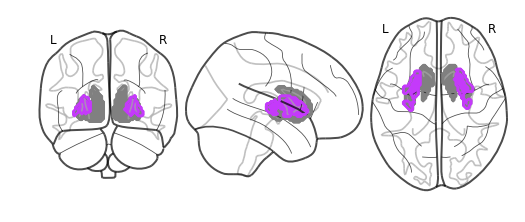

In [19]:
display = nilearn.plotting.plot_glass_brain(None)
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(VA_striatum, filled = True, colors = '#c43afa')

In [18]:
display.savefig('../templates/thumbnails/VA_striatum_xyz.png')

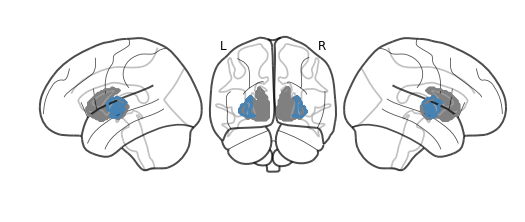

In [14]:
display = nilearn.plotting.plot_glass_brain(None)
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(SM_striatum, filled = True, colors = "#4682B4")

In [20]:
display.savefig('../templates/thumbnails/SM_striatum_xyz.png')

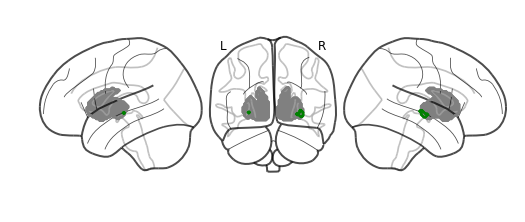

In [14]:
display = nilearn.plotting.plot_glass_brain(None)
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(DA_striatum, filled = True, colors = "#00760E")

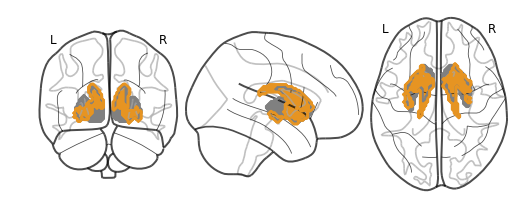

In [21]:
display = nilearn.plotting.plot_glass_brain(None)
display.add_contours(choi_full, filled = True, colors = 'grey')
display.add_contours(FP_striatum, filled = True, colors = "#E69422")

In [22]:
display.savefig('../templates/thumbnails/FP_striatum_xyz.png')

In [23]:
from ciftify.utils import run


In [24]:
import logging

logger=logging.getLogger()

In [25]:
import ciftify.config
PINT_ROIs = '/projects/edickie/code/ciftify/ciftify/data/PINT/Yeo7_2011_80verts.csv'
PINT_clut = '/projects/edickie/code/ciftify/ciftify/data/PINT/Yeo7_2011_80verts_roiidx_LUT.txt'

In [26]:
run(['ciftify_surface_rois',
     '--vertex-col', 'tvertex',
     '--labels-col', 'NETWORK',
     PINT_ROIs, '6',
     '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii',
    '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii',
     'tvertex_6mm_mid.dscalar.nii'])

0

In [27]:
run(['ciftify_surface_rois', '--debug',
     '--vertex-col', 'tvertex',
     '--labels-col', 'NETWORK',
     PINT_ROIs, '8',
     '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii',
    '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii',
     'tvertex_6mm_mid.dscalar.nii'])

0

In [28]:
run(['ciftify_surface_rois', '--debug',
     '--vertex-col', 'tvertex',
     PINT_ROIs, '2',
     '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii',
    '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii',
     'tvertex_2mm_mid.dscalar.nii'])

0

In [30]:
!mkdir ../data/vertex_probmaps_201809

In [31]:
probmap_outputs = '../data/vertex_probmaps_201809'
surfL = '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.L.midthickness_MSMAll.32k_fs_LR.surf.gii'
surfR = '/projects/edickie/code/ciftify/ciftify/data/HCP_S1200_GroupAvg_v1/S1200.R.midthickness_MSMAll.32k_fs_LR.surf.gii'
pint_concat = '../data/ciftify_fmriprep/PINT_summary_concat_qapasses_201809.csv'

In [33]:
import pandas

In [35]:

pint_concat = pandas.read_csv(pint_concat)

In [42]:
merged_data = pint_concat

In [54]:
all_SA_verts = merged_data.loc[merged_data.NETWORK == '4',:]

In [45]:
tempdir = ciftify.utils.TempDir()

In [46]:
import tempfile
tempdir = tempfile.mkdtemp()

In [55]:
import os.path
SA_verts_list = os.path.join(tempdir, "SAv.csv")
all_SA_verts.to_csv(SA_verts_list)

In [56]:
all_SA_verts

,subid,hemi,NETWORK,roiidx,tvertex,pvertex,dist_49,vertex_48,std_distance
42,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,L,4,43,2453,2420,0.0,2420,13.181836128234863
43,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,R,4,44,2411,2617,0.0,2617,5.472816467285156
44,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,L,4,45,3469,3468,0.0,3468,1.2534732818603516
45,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,R,4,46,3469,6544,0.0,6544,6.702950477600098
46,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,L,4,47,5450,5295,0.0,5295,5.134139060974121
47,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,R,4,48,30946,19681,1.630856156349182,19682,12.664511680603027
48,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,L,4,49,18804,18712,0.0,18712,4.971845626831055
49,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,R,4,50,18804,19286,0.0,19286,15.910361289978027
50,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,L,4,51,29837,29636,0.0,29636,7.994381904602051
51,sub-CMHHEF003_ses-01_task-rest_acq-CMH_run-01_...,R,4,52,29591,29640,0.0,29640,2.740837335586548


In [57]:
run(['ciftify_surface_rois', 
     '--vertex-col', 'pvertex',
     '--probmap', 
     SA_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/SAprobmap_allsubs.dscalar.nii'])

0

In [62]:
run(['ciftify_surface_rois', 
     '--vertex-col', 'tvertex',
     '--probmap', 
     SA_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/SAtvertex_allsubs.dscalar.nii'])

0

In [61]:
all_DM_verts = merged_data.loc[merged_data.NETWORK == '2',:]
DM_verts_list = os.path.join(tempdir, "DMv.csv")
all_DM_verts.to_csv(DM_verts_list)
run(['ciftify_surface_rois', 
     '--vertex-col', 'pvertex',
     '--probmap', 
     DM_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/VIprobmap_allsubs.dscalar.nii'])

0

In [63]:
all_DM_verts = merged_data.loc[merged_data.NETWORK == '3',:]
DM_verts_list = os.path.join(tempdir, "DMv.csv")
all_DM_verts.to_csv(DM_verts_list)
run(['ciftify_surface_rois', 
     '--vertex-col', 'pvertex',
     '--probmap', 
     DM_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/DAprobmap_allsubs.dscalar.nii'])

0

In [59]:
all_DM_verts = merged_data.loc[merged_data.NETWORK == '7',:]
DM_verts_list = os.path.join(tempdir, "DMv.csv")
all_DM_verts.to_csv(DM_verts_list)
run(['ciftify_surface_rois', 
     '--vertex-col', 'pvertex',
     '--probmap', 
     DM_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/DMprobmap_allsubs.dscalar.nii'])

0

In [59]:
all_DM_verts = merged_data.loc[merged_data.NETWORK == '7',:]
DM_verts_list = os.path.join(tempdir, "DMv.csv")
all_DM_verts.to_csv(DM_verts_list)
run(['ciftify_surface_rois', 
     '--vertex-col', 'pvertex',
     '--probmap', 
     DM_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/DMprobmap_allsubs.dscalar.nii'])

0

In [77]:
run(['ciftify_surface_rois', 
     '--vertex-col', 'tvertex',
     '--probmap', 
     DM_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/DMtvertex_allsubs.dscalar.nii'])

0

In [ ]:
run(['ciftify_surface_rois', 
     '--vertex-col', 'ivertex',
     '--probmap', 
     DM_verts_list, '6', surfL, surfR,
     '../vertex_probmaps/DMprobmap_allsubs.dscalar.nii'])

In [73]:
run(['wb_command', '-cifti-separate','../vertex_probmaps/DMprobmap_allsubs.dscalar.nii', 'COLUMN',
    '-metric', 'CORTEX_LEFT', os.path.join(tempdir, 'DM.L.shape.gii'),
    '-metric', 'CORTEX_RIGHT', os.path.join(tempdir, 'DM.R.shape.gii'),])
run(['wb_command', '-metric-to-volume-mapping', os.path.join(tempdir, 'DM.L.shape.gii'),
    surfL, '/opt/quarantine/FSL/5.0.10/build/data/standard/MNI152_T1_2mm.nii.gz',
    '../vertex_probmaps/L_SM_probssurf.nii.gz', '-nearest-vertex', '1'])

0

ValueError: zero-size array to reduction operation minimum which has no identity

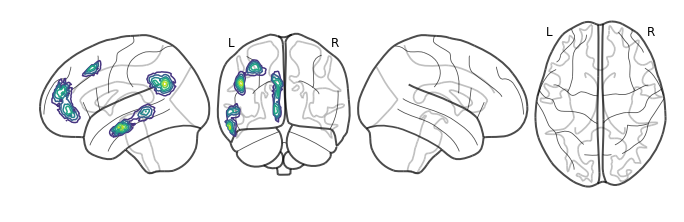

In [76]:
display = nilearn.plotting.plot_glass_brain(None, display_mode='lyrz')
display.add_contours('../vertex_probmaps/L_SM_probssurf.nii.gz',threshold=0.1)